<a href="https://colab.research.google.com/github/Swapnil-Giram/Linear-Regression/blob/main/jambore_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About The data

Jamboree has helped thousands of students make it to top colleges abroad.
Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.



### Problem

Do analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.

 It will also help predict one's chances of admission given the rest of the variables.

### Loding DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/Jamboree_Admission.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In the dataset 'Chance of Admit' is the Target column(Dependent column)

### Data engineering

In [ ]:
df.shape  # checking the shape of the data

(500, 9)

In [ ]:
df.describe() # statistical Analysis

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.isna().sum() # there is not any null value in dataset data is completely clean

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Droping the irrelevant columns
df.drop('Serial No.',axis=1,inplace=True)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

checking the outliers are present or not

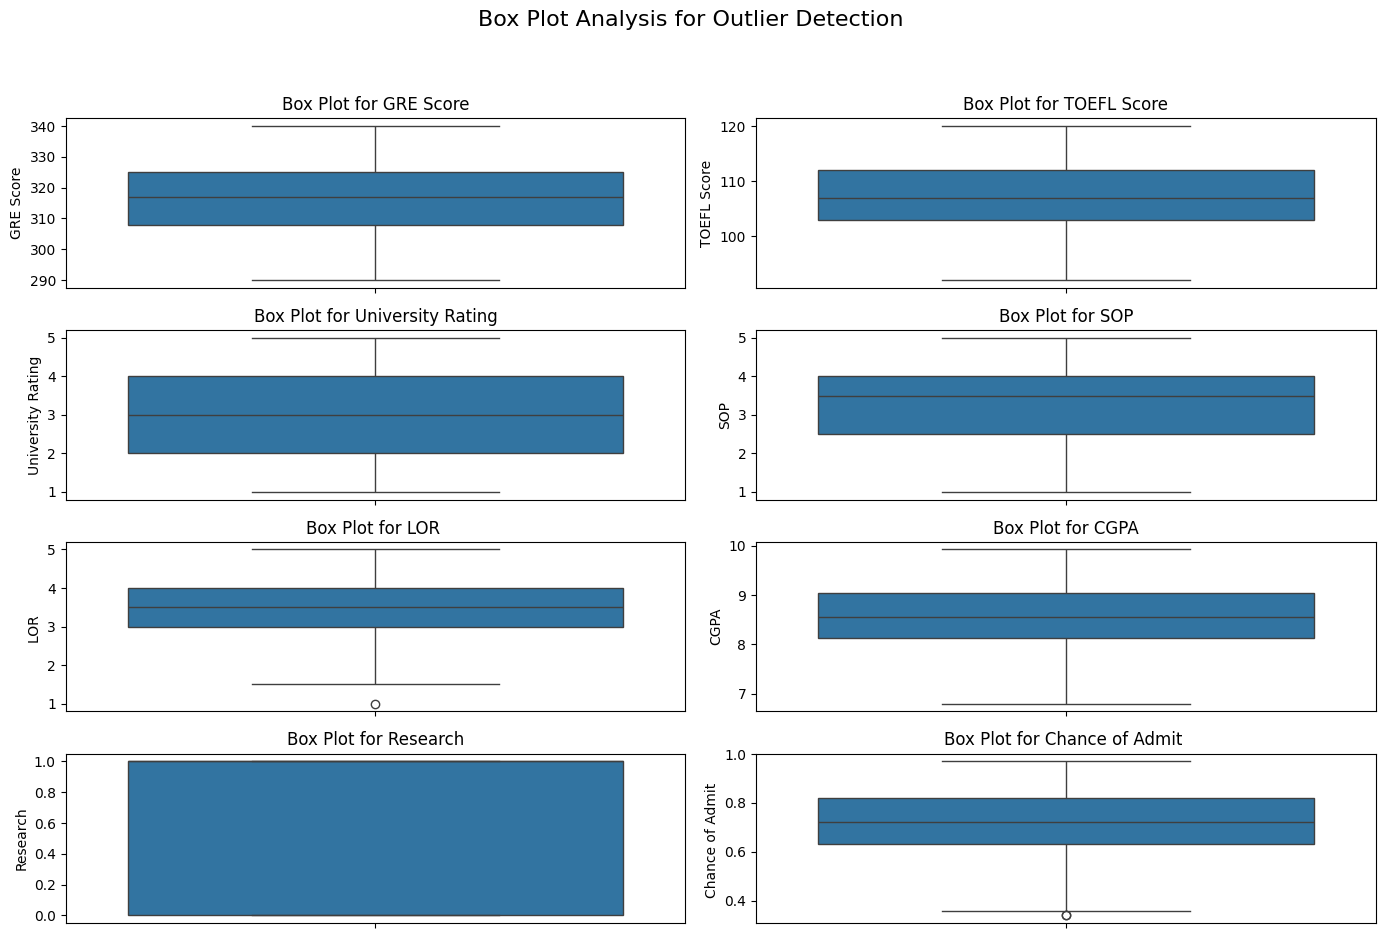

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
fig.suptitle('Box Plot Analysis for Outlier Detection', fontsize=16)

axes = axes.flatten()

# Create subplots for each variable
for i, col_name in enumerate(df.columns):
    sns.boxplot(y=df[col_name], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col_name}')  # Using ax object to set the title

# Hide any unused subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

Data has not any outliers

### Data vizulisation  


 Checking the relation between independent variables and dependent variable

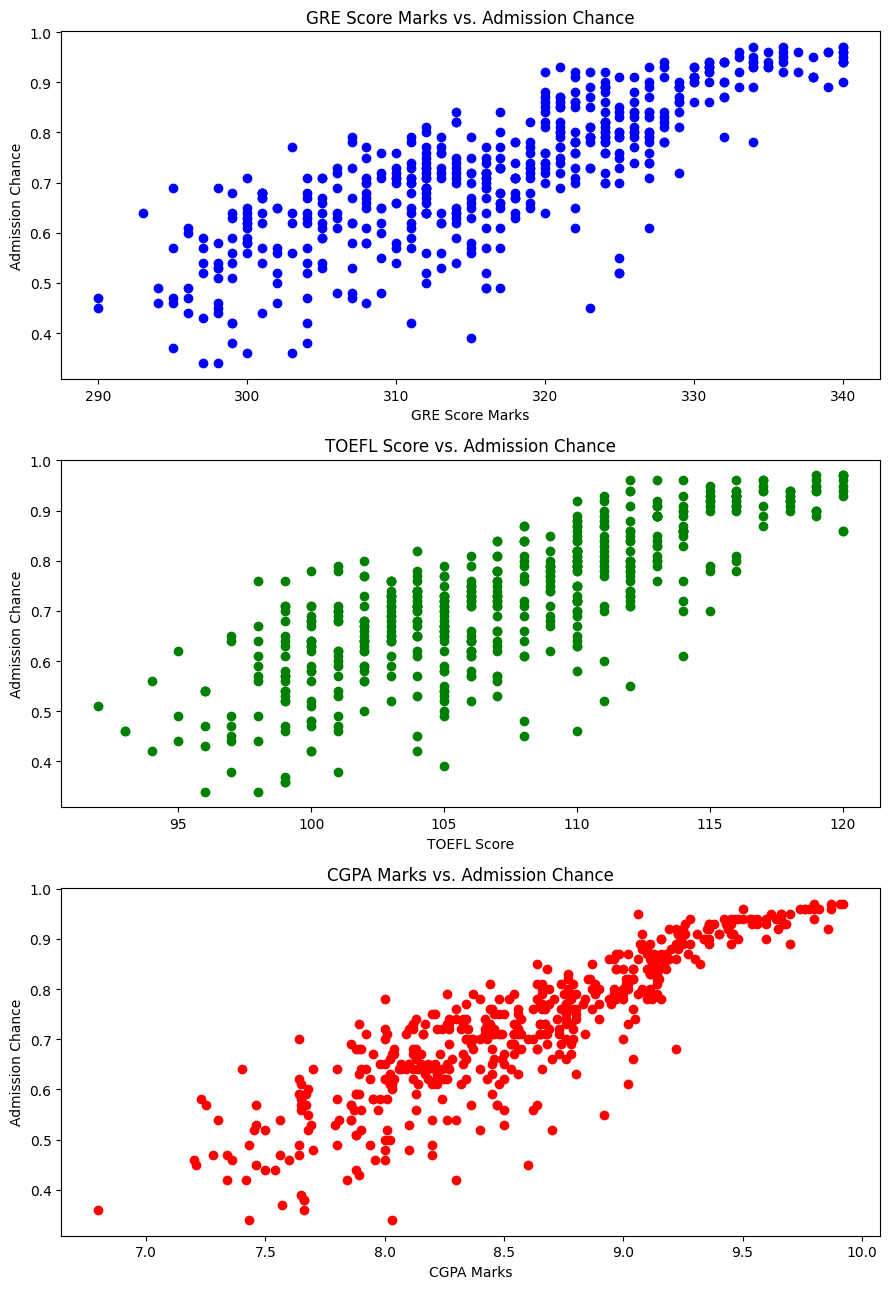

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(9, 13))

# Plot for GRE Score
axs[0].scatter(df['GRE Score'], df['Chance of Admit '], color='blue')
axs[0].set_title('GRE Score Marks vs. Admission Chance')
axs[0].set_xlabel('GRE Score Marks')
axs[0].set_ylabel('Admission Chance')

# Plot for TOEFL Score
axs[1].scatter(df['TOEFL Score'], df['Chance of Admit '], color='green')
axs[1].set_title('TOEFL Score vs. Admission Chance')
axs[1].set_xlabel('TOEFL Score')
axs[1].set_ylabel('Admission Chance')

# Plot for CGPA
axs[2].scatter(df['CGPA'], df['Chance of Admit '], color='red')
axs[2].set_title('CGPA Marks vs. Admission Chance')
axs[2].set_xlabel('CGPA Marks')
axs[2].set_ylabel('Admission Chance')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Here a linear relationship between independent and dependent variables

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Checking distribution of features (independent columns)

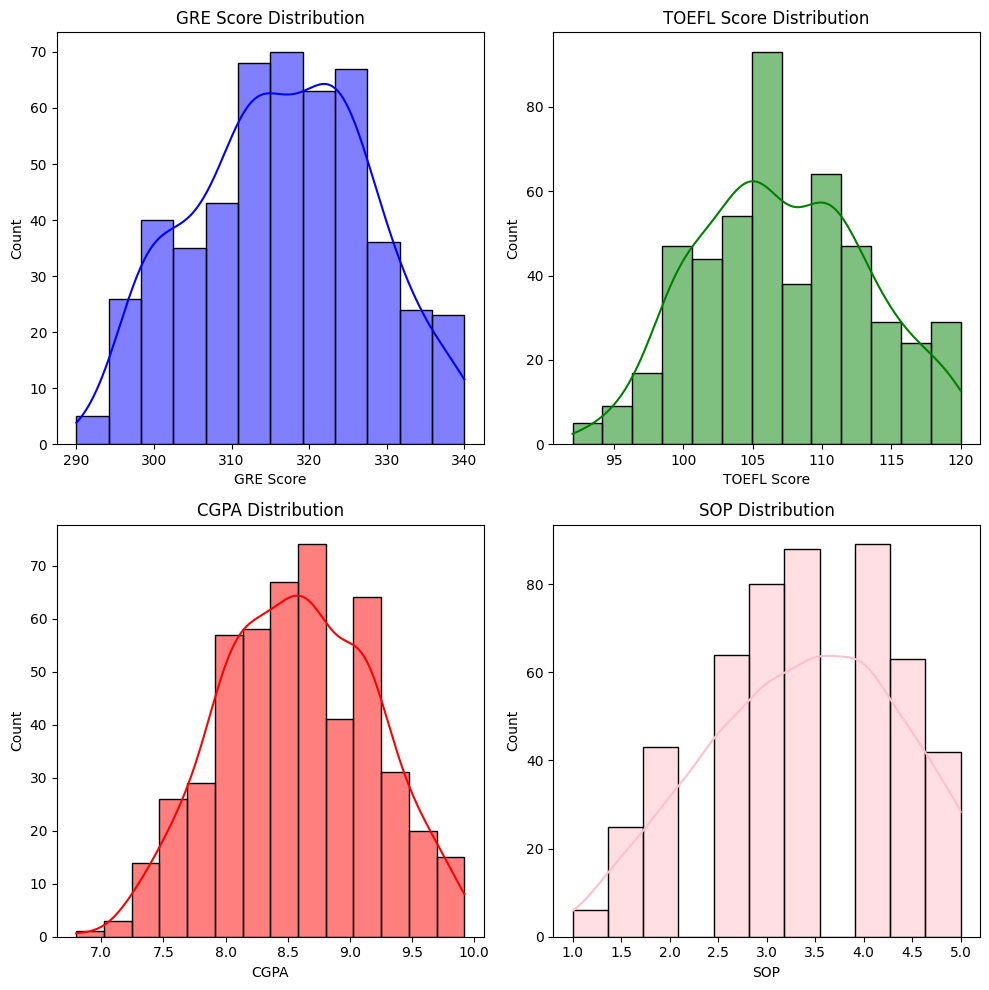

In [ ]:
# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid of subplots

# Plot for 'GRE Score'
sns.histplot(df['GRE Score'], color='blue', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('GRE Score Distribution')

# Plot for 'TOEFL Score'
sns.histplot(df['TOEFL Score'], color='green', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('TOEFL Score Distribution')

# Plot for 'CGPA'
sns.histplot(df['CGPA'], color='red', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('CGPA Distribution')

# Plot for 'SOP'
sns.histplot(df['SOP'], color='pink', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('SOP Distribution')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


Independent variables are normally distributed

Checking the relation between Independent variables

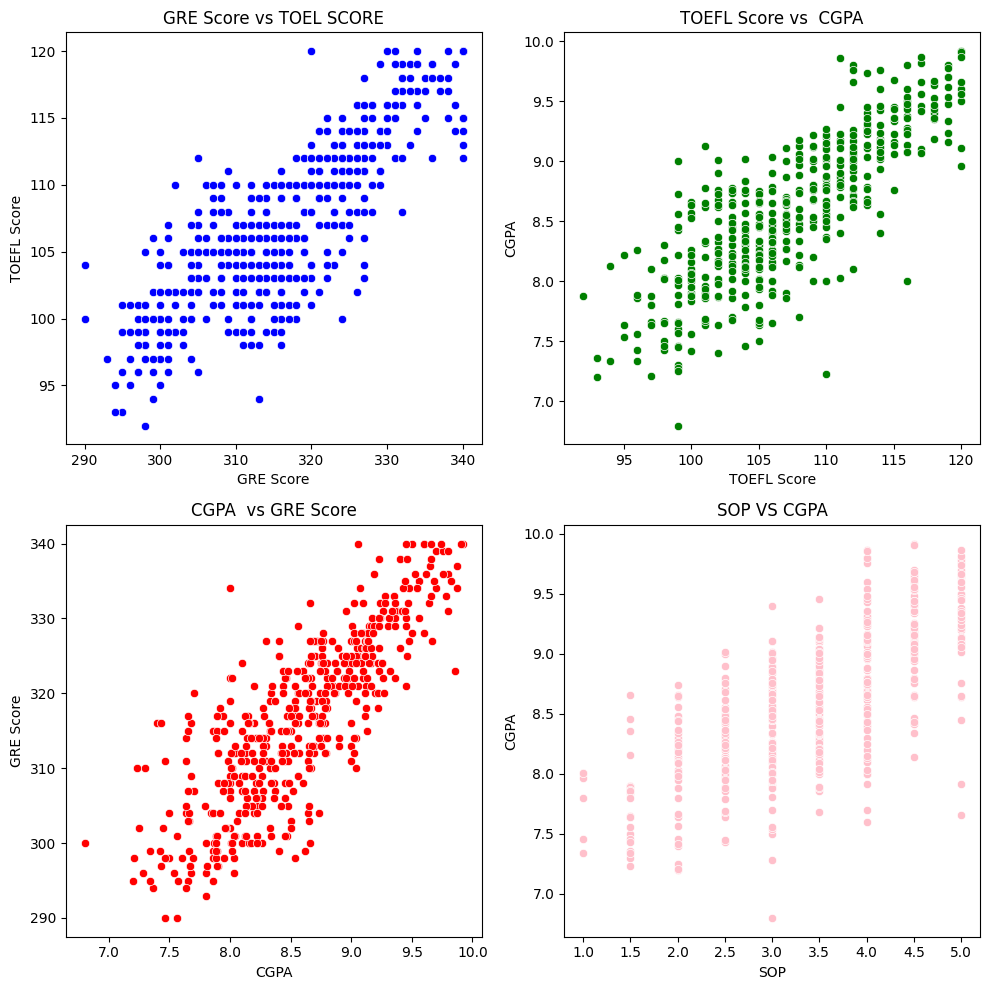

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid of subplots


# Plot for 'GRE Score'
sns.scatterplot(x='GRE Score', y='TOEFL Score', data=df, color='blue', ax=axes[0, 0]) # Removed kde
axes[0, 0].set_title('GRE Score vs TOEL SCORE')

# Plot for 'TOEFL Score'
sns.scatterplot(x='TOEFL Score', y='CGPA', data=df, color='green', ax=axes[0, 1]) # Removed kde
axes[0, 1].set_title('TOEFL Score vs  CGPA')

# Plot for 'CGPA'
sns.scatterplot(x='CGPA', y='GRE Score', data=df, color='red', ax=axes[1, 0]) # Removed kde
axes[1, 0].set_title('CGPA  vs GRE Score')

# Plot for 'SOP'
sns.scatterplot(x='SOP', y='CGPA', data=df, color='pink', ax=axes[1, 1]) # Removed kde
axes[1, 1].set_title('SOP VS CGPA')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

The independent variables are correlated with each other

This is because brilliant students have good marks in all the exams and it opposite for dump students

That is why multicollinearity is present in the dataset

But there is no relation between SOP(column represents the strength of the applicant's statement of purpose,) and CGPA

checking , multicollinearity among independent columns

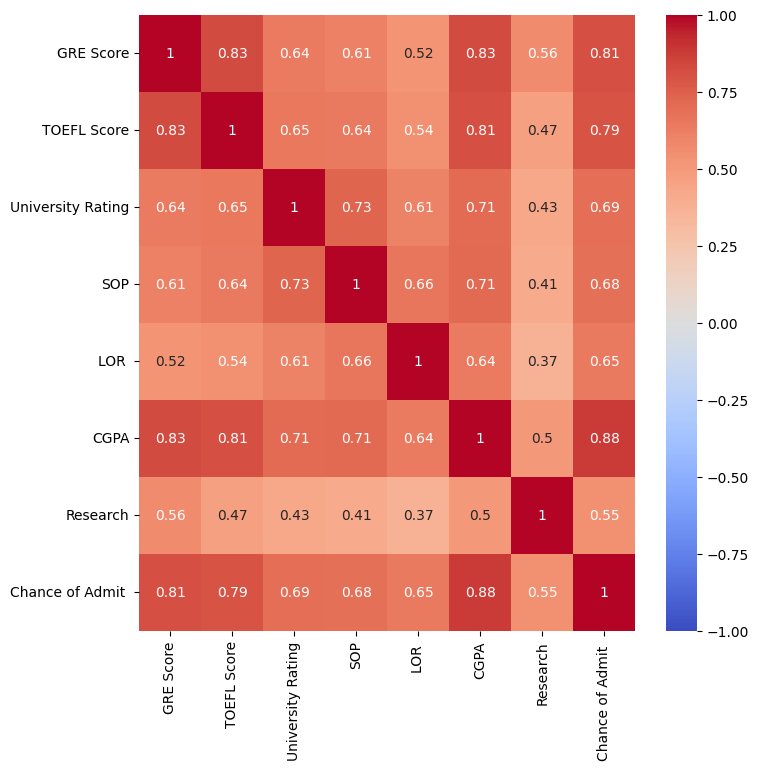

In [ ]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.titlem= ('Correlation Matrix Heatmap')
plt.show()

The correlation between CGPA and the Chance of Admit  column is high

Other independent columns are correlated with each other that's why multicollinearity is present in the dataset

From the above visualization
Good thing is
1.   The target variables are linearly associated with the independent variable
2.   The independent variable is normally distributed
3.   Data does not have any outlier

Bad thing is
1.   Independent variables are correlated with each other
2.   So the multicollinearity present in the data





### Data Preprocessing

In [ ]:
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


Transfer the data into x and y (input and output columns)

In [ ]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']


Data scaling

In [ ]:
from sklearn.preprocessing import  StandardScaler
std = StandardScaler()
sc_x = std.fit_transform(x)
sc_x

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

Spliting the data set into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.2, random_state=42)


In [ ]:
x_train = pd.DataFrame(x_train,columns=x.columns)

### Model Building

Using different algorithms to see which can perform better

In [ ]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

models = { "Ridge_regression" : Ridge(alpha=1.0),
         "Lasso_Regression" : Lasso(alpha=1.0),
          "Linear_regression" : LinearRegression()
          }
for name,model in models.items():
  model.fit(x_train,y_train)
  prediction = model.predict(pd.DataFrame(x_test,columns=x.columns))
  # print("MSE: ", name , mean_squared_error(y_test,prediction),f"modelname is {name}")
  # print("R2: ", name, r2_score(y_test,prediction),f"modelname is {name}")
  mse = mean_squared_error(y_test, prediction)
  r2 = r2_score(y_test, prediction)
  print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}")

Ridge_regression - MSE: 0.0037, R²: 0.8188
Lasso_Regression - MSE: 0.0206, R²: -0.0072
Linear_regression - MSE: 0.0037, R²: 0.8188


Here ridge and linear regression give a better result

Our Dataset has fewer columns there is no chance of overfiting so here we can use linear

Linear regression with stats model

In [ ]:
import statsmodels.api as sm   # so here we can see that adj r2 is dropping and p value of sop and University Rating  column is higher so we drop that column
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train.values,x_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          3.41e-142
Time:                        19:06:40   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7228      0.00

In the stats model summary, we can see the p-value of University Rating and SOP are high

It indicates the feature is not significant to the dependent column so we can to drop this features

In [ ]:
new_x_train = x_train_sm.drop(columns=(['SOP','University Rating',]))
model = sm.OLS(y_train.values,new_x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          1.36e-144
Time:                        19:06:47   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7228      0.003    241.112      

calculate VIF Score

higher the vif score higher the multicollinearity with independent variable

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = new_x_train.columns
vif_data['VIF'] = [variance_inflation_factor(new_x_train.values, i) for i in range(new_x_train.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
       feature       VIF
0        const  1.002156
1    GRE Score  4.471557
2  TOEFL Score  3.540082
3         LOR   1.655867
4         CGPA  4.281365
5     Research  1.504670


 if the score is now under 5 the model is fine

now the data has not multicollinearity



now lets check on test data

In [ ]:
x_test = pd.DataFrame(x_test,columns=x.columns)
new_x_test = x_test.drop(columns=(['SOP','University Rating']))
x_test_sm = sm.add_constant(new_x_test)
model = sm.OLS(y_test.values,x_test_sm).fit()
predict = model.predict(x_test_sm)


Evaluate the model’s performance.

In [ ]:
rmse = mean_squared_error(y_test, predict)
print(f"Mean Squared Error (RMSE) on Test Data: {rmse}")

mae = np.mean(np.abs(y_test - predict))
print(f"Mean Absolute Error (MAE) on Test Data: {mae}")

r2 = model.rsquared
print(f"R-squared on Training Data: {r2}")

Mean Squared Error (RMSE) on Test Data: 0.003379399623311459
Mean Absolute Error (MAE) on Test Data: 0.14584815161028467
R-squared on Training Data: 0.8347481846791462


the good r2 on test data so our model predicts well

cheacking the mean of residual

In [ ]:
residuals = y_test.values - predict
mean = np.mean(residuals)
mean

-4.063416270128073e-16

Test of homoscedasticity

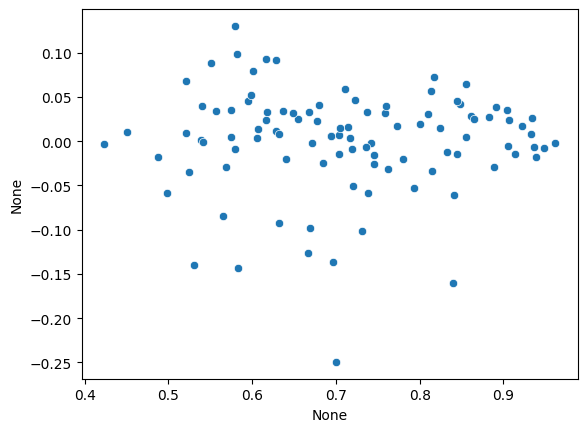

In [ ]:
fig = sns.scatterplot(x=predict, y=residuals) # there is no pattern in data error terms are randomly distributed
plt.title='homoscedasticity'
plt.show()

The are no any patterns in the residual

ploting the residual

<Axes: ylabel='Count'>

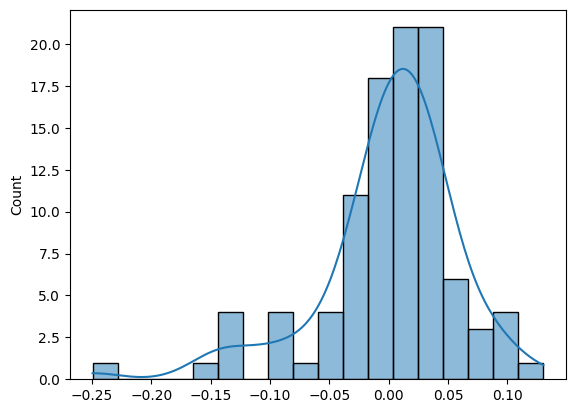

In [ ]:
sns.histplot(residuals,kde=True)

we can see that residuals are normally distributed

and we check all the assumptions of linear regression



### Key Insights


*   high GRE, TOEFL, and CGPA scores are strongly associated with a higher chance of admission

*  Having research experience positively impact the likelihood of being admitted

*   LOR(Letter of Recommendation): Strong contribute to better admission chances





### Recommendation

1.Focus on Academics and Test Preparation
*   Encourage Student to improve their GRE and TOEFL scores as these have the most significant impact on their admission chances.

*   Maintain a high CGPA throughout their undergraduate studies


2.Promote Research Opportunities

* Students should be encouraged to participate in research projects to enhance their profile





In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
